In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

In [2]:
import zipfile

zip_ref = zipfile.ZipFile('/content/archive.zip')
zip_ref.extractall()
zip_ref.close()

In [3]:
!ls Grapevine_Leaves_Image_Dataset

Ak  Ala_Idris  Buzgulu	Dimnit	Grapevine_Leaves_Image_Dataset_Citation_Request.txt  Nazli


In [4]:
import os

for dirpath, dirnames, filenames in os.walk('Grapevine_Leaves_Image_Dataset'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 5 directories and 1 images in Grapevine_Leaves_Image_Dataset.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Ala_Idris.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Dimnit.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Ak.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Nazli.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Buzgulu.


In [5]:
for i in os.walk('Grapevine_Leaves_Image_Dataset'):
  print(i)

('Grapevine_Leaves_Image_Dataset', ['Ala_Idris', 'Dimnit', 'Ak', 'Nazli', 'Buzgulu'], ['Grapevine_Leaves_Image_Dataset_Citation_Request.txt'])
('Grapevine_Leaves_Image_Dataset/Ala_Idris', [], ['Ala_Idris (88).png', 'Ala_Idris (14).png', 'Ala_Idris (3).png', 'Ala_Idris (84).png', 'Ala_Idris (69).png', 'Ala_Idris (34).png', 'Ala_Idris (11).png', 'Ala_Idris (27).png', 'Ala_Idris (16).png', 'Ala_Idris (96).png', 'Ala_Idris (86).png', 'Ala_Idris (85).png', 'Ala_Idris (10).png', 'Ala_Idris (94).png', 'Ala_Idris (35).png', 'Ala_Idris (70).png', 'Ala_Idris (33).png', 'Ala_Idris (17).png', 'Ala_Idris (7).png', 'Ala_Idris (100).png', 'Ala_Idris (59).png', 'Ala_Idris (60).png', 'Ala_Idris (61).png', 'Ala_Idris (47).png', 'Ala_Idris (77).png', 'Ala_Idris (57).png', 'Ala_Idris (75).png', 'Ala_Idris (79).png', 'Ala_Idris (64).png', 'Ala_Idris (29).png', 'Ala_Idris (48).png', 'Ala_Idris (21).png', 'Ala_Idris (22).png', 'Ala_Idris (52).png', 'Ala_Idris (55).png', 'Ala_Idris (12).png', 'Ala_Idris (67).

In [6]:
num_rice_directories = len(os.listdir('/content/Grapevine_Leaves_Image_Dataset'))
num_rice_directories

6

In [7]:
import pathlib
data_dir = pathlib.Path('/content/Grapevine_Leaves_Image_Dataset')
data_dir

PosixPath('/content/Grapevine_Leaves_Image_Dataset')

In [8]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Ak' 'Ala_Idris' 'Buzgulu' 'Dimnit'
 'Grapevine_Leaves_Image_Dataset_Citation_Request.txt' 'Nazli']


In [9]:
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir + target_class
  random_img = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (511, 511, 4)


array([[[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       ...,

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1.

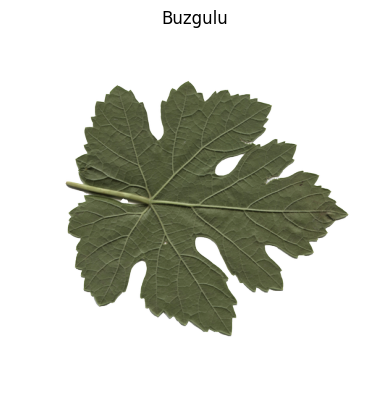

In [11]:
img = view_random_image(target_dir='/content/Grapevine_Leaves_Image_Dataset/',target_class='Buzgulu')
img

In [12]:
img/255

array([[[0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.003921

# Fit the model

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
valid_datagen = ImageDataGenerator(rescale=1./255)

dir = '/content/Grapevine_Leaves_Image_Dataset'

In [14]:
train_data = train_datagen.flow_from_directory(directory=dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               subset='training',
                                               seed=42)

valid_data = train_datagen.flow_from_directory(directory=dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               subset='validation',
                                               seed=42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation='softmax')
])

Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [16]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 592ms/step - accuracy: 0.1970 - loss: 1.6646 - val_accuracy: 0.2800 - val_loss: 1.6034
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 245ms/step - accuracy: 0.4554 - loss: 1.5508 - val_accuracy: 0.2500 - val_loss: 1.5837
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - accuracy: 0.4651 - loss: 1.4378 - val_accuracy: 0.2900 - val_loss: 1.5887
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - accuracy: 0.6087 - loss: 1.2451 - val_accuracy: 0.3200 - val_loss: 1.5958
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - accuracy: 0.7409 - loss: 0.9671 - val_accuracy: 0.3200 - val_loss: 1.6871


In [17]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │         140,455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 430,397 (1.64 MB)

 Trainable params: 143,465 (560.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 286,932 (1.09 MB)

In [18]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model_2.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 478ms/step - accuracy: 0.2172 - loss: 66.0440 - val_accuracy: 0.2000 - val_loss: 36.6582
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - accuracy: 0.1755 - loss: 31.5937 - val_accuracy: 0.2300 - val_loss: 20.0572
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 304ms/step - accuracy: 0.1860 - loss: 16.1437 - val_accuracy: 0.2000 - val_loss: 8.4252
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 229ms/step - accuracy: 0.1740 - loss: 6.8747 - val_accuracy: 0.2000 - val_loss: 2.8028
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 226ms/step - accuracy: 0.1981 - loss: 2.5338 - val_accuracy: 0.2000 - val_loss: 1.9975


In [20]:
len(train_data)

13

Image shape: (511, 511, 4)
Image shape: (511, 511, 4)
Image shape: (511, 511, 4)
Image shape: (511, 511, 4)


array([[[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       ...,

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1.

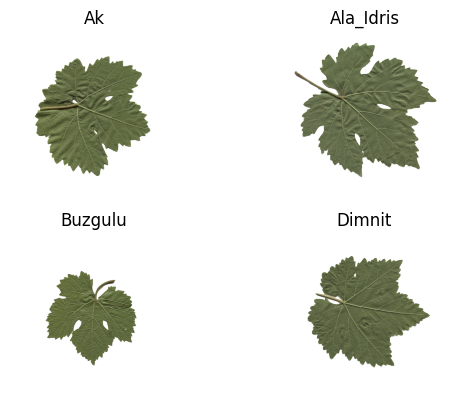

In [24]:
plt.figure()
plt.subplot(2,2,1)
view_random_image('Grapevine_Leaves_Image_Dataset/','Ak')
plt.subplot(2,2,2)
view_random_image('Grapevine_Leaves_Image_Dataset/','Ala_Idris')
plt.subplot(2,2,3)
view_random_image('Grapevine_Leaves_Image_Dataset/','Buzgulu')
plt.subplot(2,2,4)
view_random_image('Grapevine_Leaves_Image_Dataset/','Dimnit')

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
valid_datagen = ImageDataGenerator(rescale=1./255)

dir = '/content/Grapevine_Leaves_Image_Dataset'

train_data = train_datagen.flow_from_directory(directory=dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               subset='training',
                                               seed=42)

test_data = train_datagen.flow_from_directory(directory=dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               seed=42)

Found 400 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [26]:
images, labels = next(train_data)

In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation, MaxPool2D
from tensorflow.keras import Sequential

In [29]:
tf.keras.backend.clear_session()

In [30]:
model_3 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    MaxPool2D(2),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(5, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
optimizer=Adam(learning_rate=1e-3)
model_3.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [32]:
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 527ms/step - accuracy: 0.2080 - loss: 1.6093 - val_accuracy: 0.2000 - val_loss: 1.6098
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 253ms/step - accuracy: 0.1839 - loss: 1.6108 - val_accuracy: 0.2000 - val_loss: 1.6082
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 241ms/step - accuracy: 0.1906 - loss: 1.6070 - val_accuracy: 0.2000 - val_loss: 1.6080
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 315ms/step - accuracy: 0.2038 - loss: 1.6056 - val_accuracy: 0.2100 - val_loss: 1.6072
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 256ms/step - accuracy: 0.2238 - loss: 1.6021 - val_accuracy: 0.2400 - val_loss: 1.6071


In [33]:
model_2.evaluate(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step - accuracy: 0.2343 - loss: 1.7658


[1.743073582649231, 0.23600000143051147]

In [34]:
model_3.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 0.2379 - loss: 1.6024


[1.601935625076294, 0.23999999463558197]

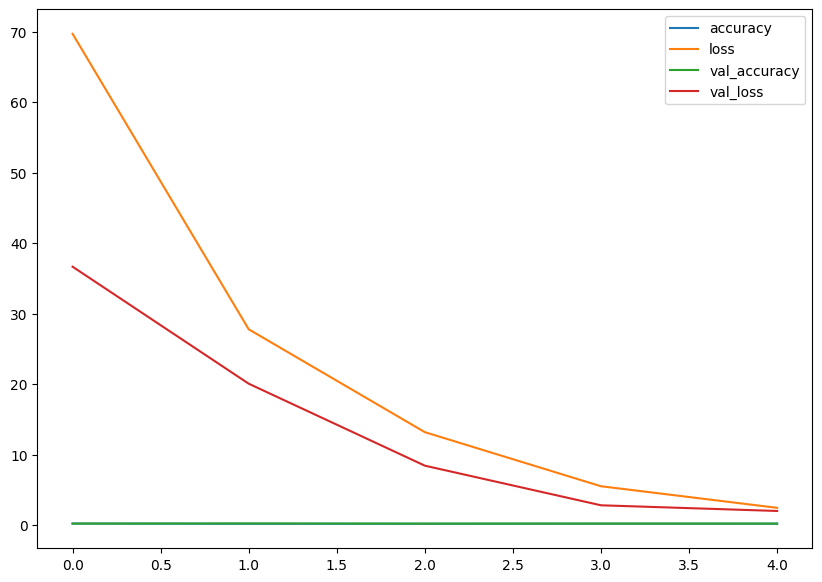

In [35]:
pd.DataFrame(history_2.history).plot(figsize=(10, 7));

In [36]:
history_3.history

{'accuracy': [0.19249999523162842,
  0.20250000059604645,
  0.19750000536441803,
  0.20749999582767487,
  0.20749999582767487],
 'loss': [1.612795114517212,
  1.608384132385254,
  1.6065897941589355,
  1.6050256490707397,
  1.6033035516738892],
 'val_accuracy': [0.20000000298023224,
  0.20000000298023224,
  0.20000000298023224,
  0.20999999344348907,
  0.23999999463558197],
 'val_loss': [1.609750509262085,
  1.6081979274749756,
  1.6079941987991333,
  1.6071549654006958,
  1.607127070426941]}

In [37]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs=range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

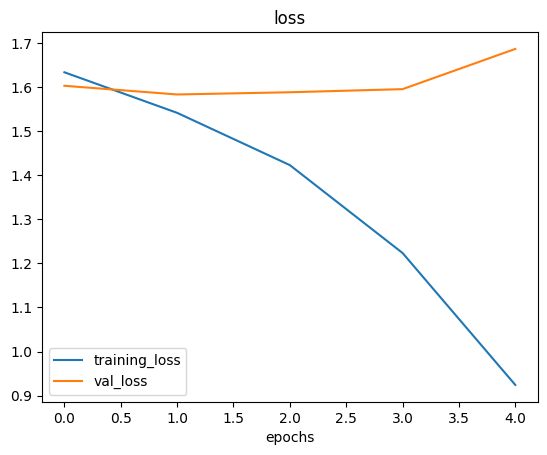

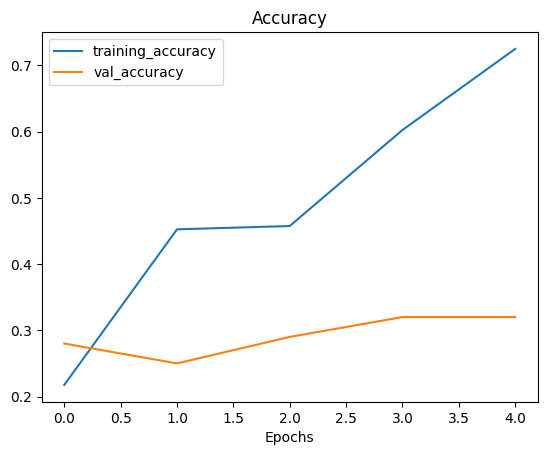

In [38]:
plot_loss_curves(history_1)